<a href="https://colab.research.google.com/github/satwiksps/Machine_Learning/blob/main/10_Comparing_ML_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Compare Machine Learning Algorithms**

In [8]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [1]:
#Pima-Indian-Diabetes Dataset
from pandas import read_csv
url = 'https://raw.githubusercontent.com/erojaso/MLMasteryEndToEnd/master/data/pima-indians-diabetes.data.csv' #Load CSV using Pandas
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] #Define column names
data = read_csv(url, names=column_names) #Load CSV using Pandas
array = data.values #Convert to NumPy array
X = array[:,0:8] #Split into input column
Y = array[:,8] #Split into output column

In [4]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

In [6]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s -> accuracy: (%f), Standard Deviation: (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR -> accuracy: (0.769515), Standard Deviation: (0.048411)
LDA -> accuracy: (0.773462), Standard Deviation: (0.051592)
KNN -> accuracy: (0.726555), Standard Deviation: (0.061821)
CART -> accuracy: (0.687457), Standard Deviation: (0.060036)
NB -> accuracy: (0.755178), Standard Deviation: (0.042766)
SVM -> accuracy: (0.760424), Standard Deviation: (0.052931)


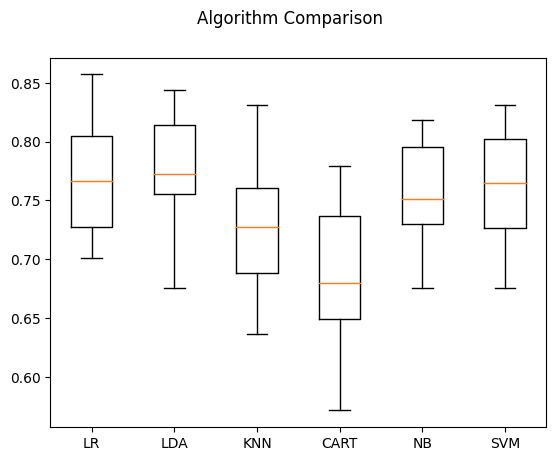

In [7]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()